Student: Veljko Milojevic


broj indeksa: 2023/3066

In [1]:
print((3+0+6+6)%3)

0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations_with_replacement

In [3]:
%matplotlib inline

In [4]:
# define constants
SEED = 123
ALPHA = 0.2
DPI = 100
FIGSIZE = (10, 6)

In [5]:
# train test split function
def train_test_split(X, y, split_per):
    test_ind = np.random.rand(X.shape[0]) < split_per/100

    X_train = X[~test_ind]
    y_train = y[~test_ind]
    X_test =  X[test_ind]
    y_test = y[test_ind]

    return X_train, y_train, X_test, y_test

In [6]:
# polynoimial feature expansion
def polynomial_expansion(X, deg=2):
    index = np.arange(X.shape[-1])
    degs = 2
    while(degs<=deg):
        combinations = combinations_with_replacement(index, degs)
        
        for comb in list(combinations):
            temp = np.ones(shape=X.shape[0])
            for i in range(len(comb)):
                temp *= X[:, comb[i]]
            temp = temp.reshape(len(temp), 1)
            
            X = np.concatenate((X, temp), axis=1)
        degs += 1
    return X

In [7]:
# calculation of ridge regression parameters
def calculate_regression_parameters(X, y, alpha=0):
    X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X),
                              axis=1)
    theta = np.zeros(shape=(X.shape[-1], 1))
    
    A = np.identity(X.shape[-1])
    A[0, 0] = 0
    A *= alpha
    theta = np.linalg.inv(X.T@X + A)@X.T@y
    return theta

In [8]:
# predict function
def predict(X, theta):
    X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X),
                              axis=1)
    return X@theta

In [9]:
# function for score calculation, score is defined as negative mean square error
def calculate_score(X, y, theta):
    y_hat = predict(X, theta)
    score = -np.mean((y-y_hat)**2)**0.5
    return score

In [10]:
# cross validation function for chosing hyperparameter 
def cross_validation(X, y, k, alphas):
    train_scores = np.empty(shape=(alphas.shape[-1], k))
    val_scores = np.empty(shape=(alphas.shape[-1], k))
    
    N = X.shape[0]
    no = N//k
    ind = np.arange(N)
    
    for i in range(alphas.shape[-1]):
        for j in range(k):
            val_ind = (ind>=j*no) & (ind<(j+1)*no)
            train_ind = ~val_ind
            
            theta = calculate_regression_parameters(X[train_ind, ::], y[train_ind], alphas[i])
            
            train_scores[i, j] = calculate_score(X[train_ind, ::], y[train_ind], theta)
            val_scores[i, j] = calculate_score(X[val_ind, ::], y[val_ind], theta)
           
    train_scores_mean = np.mean(train_scores, axis=-1)
    train_scores_std = np.std(train_scores, axis=-1)
    
    val_scores_mean = np.mean(val_scores, axis=-1)
    val_scores_std = np.std(val_scores, axis=-1)
    
    
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.plot(alphas, train_scores_mean, label="training",
            color="darkorange")
    plt.fill_between(alphas, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=ALPHA,
                     color="darkorange")
    plt.plot(alphas, val_scores_mean, label="validation",
                 color="navy")
    plt.fill_between(alphas, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=ALPHA,
                     color="navy")
    plt.legend(loc="best")
    plt.grid(alpha=ALPHA)
    plt.ylabel('score')
    plt.xlabel('regularization parameter')
    plt.title('K-fold Cross-Validation')
    plt.tight_layout()
    plt.show()
    
    return alphas[np.argmax(val_scores_mean)]

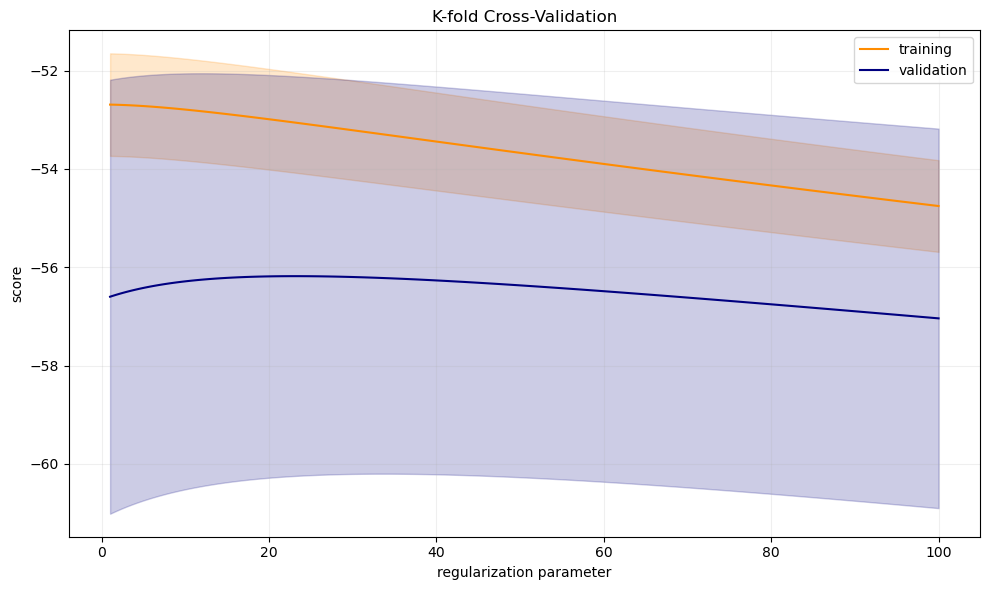

23.644894126454084


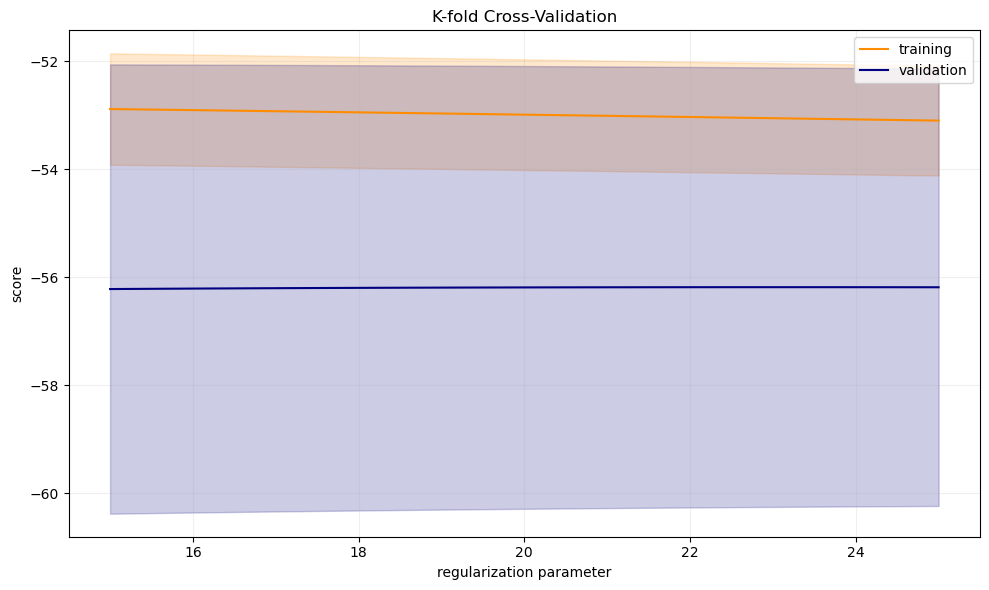

RMSE:  65.42465154626203


In [11]:
# main code

plt.close('all')
# setting seed for random generator
np.random.seed(SEED)

# reading data
data = pd.read_csv('data.csv').to_numpy()
X = data[:, 0:5]
y = data[:, 5]

test_per = 10
X_train, y_train, X_test, y_test = train_test_split(X, y, test_per)

# polynomial expansion
X_train2 = polynomial_expansion(X_train, deg=2)
X_test2 = polynomial_expansion(X_test, deg=2)


# standard scaling
X2_mean = np.mean(X_train2, axis=0)
X2_std = np.std(X_train2, axis=0)

for i in range(X_train2.shape[-1]):
    # train data
    X_train2[::, i] -= X2_mean[i]
    X_train2[::, i] /= X2_std[i]
    
    # test data
    X_test2[::, i] -= X2_mean[i]
    X_test2[::, i] /= X2_std[i]

k = 5
alphas = np.logspace(0, 2, 100)
print(cross_validation(X_train2, y_train, k=k, alphas=alphas))

alphas = np.linspace(15, 25, 100)
alpha = cross_validation(X_train2, y_train, k=k, alphas=alphas)

thetas = calculate_regression_parameters(X_train2, y_train, alpha)

print("RMSE: ", -calculate_score(X_test2, y_test, thetas))
# print(thetas)
# from sklearn.linear_model import Ridge
# ridge_reg = Ridge(alpha)
# ridge_reg.fit(X_train2, y_train)
# print(ridge_reg.coef_)
# y_hat = ridge_reg.predict(X_test2)
# print("MSE: ", np.mean((y_test-y_hat)**2))

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('data.csv').to_numpy()
X = data[:, 0:5]
y = data[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

X_train_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_test_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
scaler = StandardScaler().fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

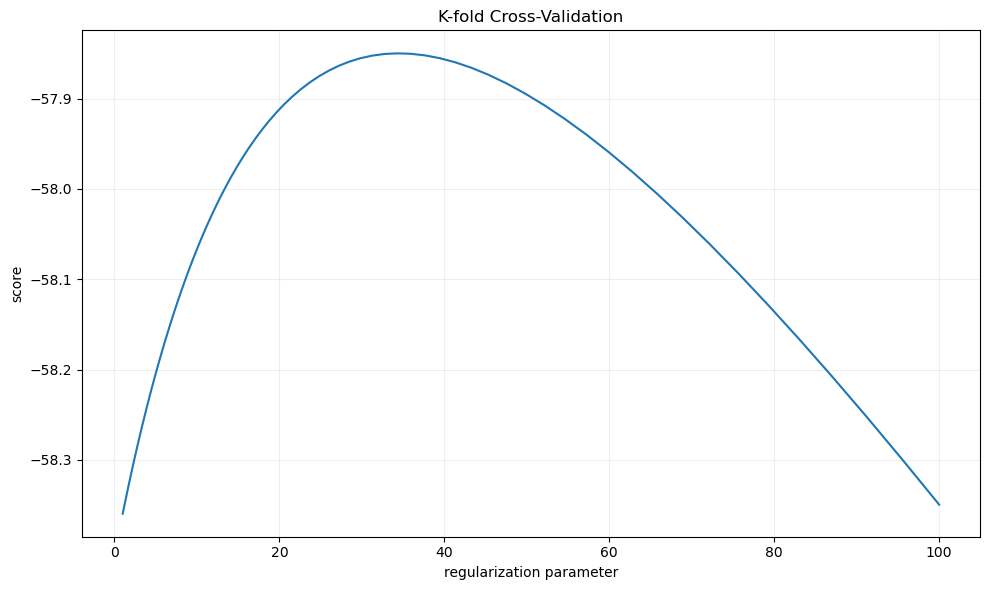

34.30469286314919


In [14]:
alphas = np.logspace(0, 2, 100)
scores = [cross_val_score(Ridge(alpha), X_train_2, y_train, cv=k, 
                          scoring='neg_root_mean_squared_error').mean()
        for alpha in alphas]

plt.figure(figsize=FIGSIZE, dpi=DPI)
plt.plot(alphas, scores)
plt.grid(alpha=ALPHA)
plt.ylabel('score')
plt.xlabel('regularization parameter')
plt.title('K-fold Cross-Validation')
plt.tight_layout()
plt.show()
print(alphas[np.argmax(scores)])

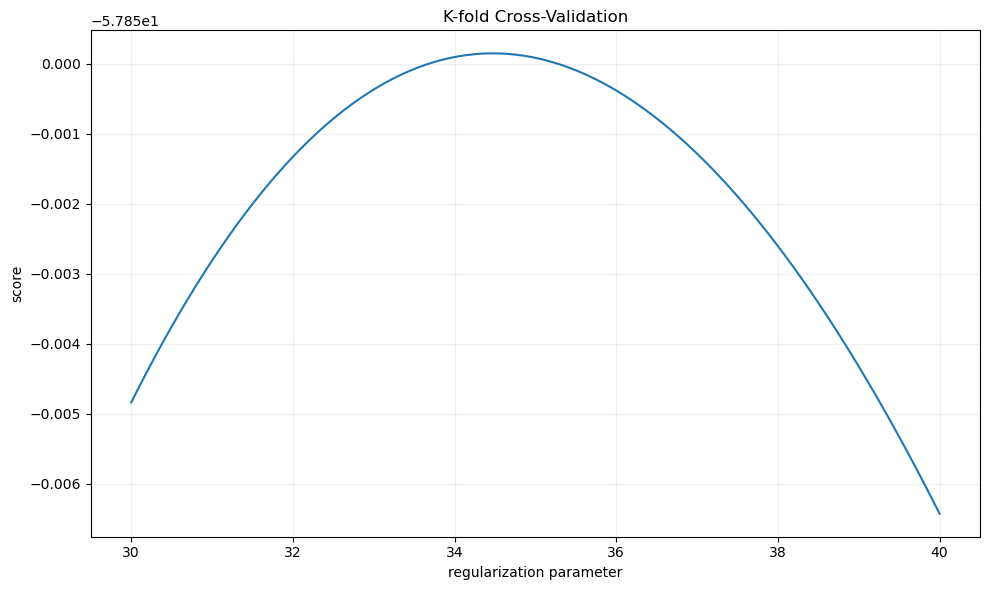

In [15]:
alphas = np.linspace(30, 40, 100)
scores = [cross_val_score(Ridge(alpha), X_train_2, y_train, cv=k, 
                          scoring='neg_root_mean_squared_error').mean()
        for alpha in alphas]

plt.figure(figsize=FIGSIZE, dpi=DPI)
plt.plot(alphas, scores)
plt.grid(alpha=ALPHA)
plt.ylabel('score')
plt.xlabel('regularization parameter')
plt.title('K-fold Cross-Validation')
plt.tight_layout()
plt.show()

In [16]:
ridge_reg = Ridge(alphas[np.argmax(scores)])
ridge_reg.fit(X_train_2, y_train)
print("RMSE: ", np.mean(((y_test-ridge_reg.predict(X_test_2))**2))**0.5)

RMSE:  60.17911959453525
